In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn 
sklearn.set_config(display='diagram')

## Executive Summary:

### Contents:

- [Nominal Categories](#Nominal-Categories:)
- [Ordinal Categories](#Ordinal-Categories:)
- [Pipeline Preprocessing](#Pipeline-Preprocessing)
- [Baseline Model](#Dummy-Model)
- [Lasso Model](#Lasso-Model)
- [Elastic Net](#Elastic-Net)
- [SVR](#SVR)
- [K Neighbors Regressor](#K-Neighbors-Regressor)
- [Ridge Model](#Ridge-Model)

## Nominal Categories:

- *ms_subclass*
- *ms_zoning*: A (Agiculture), C (Commercial), FV (Floating Village Residential), I (Industrial), RH (Residential High Density), RL (Residential Low Density), RP (Residential Low Density Park), RM (Residential Medium Density)
- *street*: Grvl (Gravel) & Pave (Paved)
- *alley*
- *land_contour*
- *neighborhood*
- *condition_1*
- *condition_2*
- *bldg_type*
- *house_style*
- *roof_style*: Flat, Gable, Gambrel, Hip, Mansard, Shed
- *roof_matl*: ClyTile, CompShg, Membran, Metal, Roll, Tar&Grv,WdShake,WdShngl
- *exterior_1st*: 
- *exterior_2nd*:
- *mas_vnr_type*: BrikCmn, BrkFace, CBlock, None, Stone
- *foundation*
- *heating*
- *central_air*
- *garage_type*
- *misc_feature*
- *sale_type*
- *sale_condition*

## Ordinal Categories:
(Ordered Most Important to Least Important)

- *lot_shape*: Regular (Reg), Slightly Irregular (IR1), Moderately Irregular (IR2), Irregular (IR3)
- *utilitities*: AllPub , NoSewr, NoSeWa, ELO
- *land_slope*: Gtl, Mod, Sev
- *overall_qual*: 10, 9, 8, 7, 6, 5, 4, 3, 2, 1
- *overall_cond*: 10, 9, 8, 7, 6, 5, 4, 3, 2, 1
- *exter_qual*: Ex, Gd, TA, Fa, Po
- *exter_cond*: Ex, Gd, TA, Fa, Po
- *bsmt_qual*: Ex - Excellent (100 + inches), Gd - Good(90-99 inches), TA - Typical (80-89 inches), Fa - Fair (70-79 inches), Po - Poor (<70 inches), NA - No Basement
- *bsmt_cond*: Ex, Gd, TA, Fa, Po, NA
- *bsmt_exposure*: Gd, Av, Mn, No, NA
- *bsmtfin_type_1*: GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA
- *bsmtfin_type_2*: GLQ, ALQ, BLQ, Rec, LwQ, Unf, NA
- *heating_qc*: Ex, Gd, TA, Fa, Po
- *electrical*: SBrker, FuseA, FuseF, FuseP, Mix
- *kitchen_qual*: Ex, Gd, TA, Fa, Po
- *functional*: Typ, Min1, Min2, Mod, Maj1,Maj2, Sev, Sal
- *fireplace_qu*: Ex, Gd, TA, Fa, Po, NA
- *garage_finish*: Fin, RFn, Unf, NA
- *garage_qual*: Ex, Gd, TA, Fa, Po, NA
- *garage_cond*: Ex, Gd, TA, Fa, Po, NA
- *paved_drive*: Y, P, N
- *pool_qc*: Ex, Gd, TA, Fa, NA
- *fence*: GdPrv, MnPrv,GdWo, MnWw, NA

In [3]:
# load in our data

train = pd.read_csv("../datasets/train.csv")
test = pd.read_csv("../datasets/test.csv")

In [4]:
# get the shape of both dfs

print(train.shape, test.shape)

(2051, 81) (878, 80)


In [5]:
# take a peak at feature names

train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
train.head(20)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [7]:
train.describe(include='all')

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,...,2051.000000,2051.000000,9,400,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,NaN,4,4,5,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,NaN
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,...,NaN,NaN,4,227,56,NaN,NaN,NaN,1781,NaN
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,...,16.511458,2.397855,NaN,NaN,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,...,57.374204,37.782570,NaN,NaN,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,12789.000000
25%,753.500000,5.284581e+08,20.000000,NaN,58.000000,7500.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,129825.000000
50%,1486.000000,5.354532e+08,50.000000,NaN,68.000000,9430.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,162500.000000
75%,2198.000000,9.071801e+08,70.000000,NaN,80.000000,11513.500000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,214000.000000


In [8]:
# sns.pairplot(train)

Since, I think greater living area is going to impact sale price lets take a look at that relationship. We can clearly identify a couple of outliers in the bottom right corner. Since they are so far from the rest of our data points we should remove them from our training set. Also, we can clearly see a positive correlation between Gr Liv Area and Sale Price.

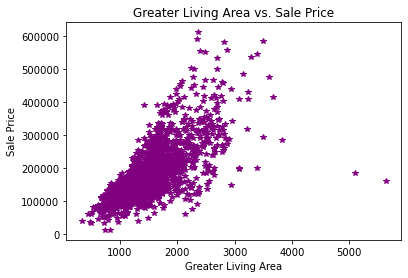

In [9]:
# Let's plot Greater Living Area vs. Sale Price

plt.plot(train['Gr Liv Area'],train['SalePrice'],'*',color='purple')
plt.title("Greater Living Area vs. Sale Price")
plt.xlabel("Greater Living Area")
plt.ylabel("Sale Price");
plt.savefig('../img/GrSale')

In [10]:
# filter out all gr liv area values over 4000
train = train[train['Gr Liv Area'] < 4000]


In [13]:
full_data = pd.concat([train,test])

In [15]:
full_data.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0


In [16]:
# clean up the feature names for easier access later on

full_data.columns = full_data.columns.str.replace(" ","_")
full_data.columns = full_data.columns.str.replace("/","_")
full_data.columns = full_data.columns.str.lower()

In [17]:
full_data['overall_qual'].head()

0    6
1    7
2    5
3    5
4    6
Name: overall_qual, dtype: int64

In [18]:
# map the overall_qual values to 1-4 based on ranges

# full_data['overall_qual']=pd.qcut(full_data['overall_qual'],4,labels=[1,2,3,4])
# full_data['overall_cond'] = pd.qcut(full_data['overall_cond'],3,labels=[1,2,3])
# full_data['year_built']= pd.qcut(full_data['year_built'].astype(int),4,[1,2,3,4])
# full_data['year_remod_add'] = pd.qcut(full_data['year_remod_add'].astype(int),4,[1,2,3,4])

In [19]:
# confirm columns were changed

full_data.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [20]:
# confirm they were dropped

full_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0


In [21]:
# map all ordinal categories to integer values

full_data['bsmt_cond'] = full_data['bsmt_cond'].map({'Na':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
full_data['heating_qc'] = full_data['heating_qc'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
full_data['bsmtfin_type_1'] = full_data['bsmtfin_type_1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
full_data['bsmt_exposure'] = full_data['bsmt_exposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
full_data['bsmt_qual'] = full_data['bsmt_qual'].map({'NA':0,'Po':1,'Fa':2,'Ta':3,'Gd':4,'Ex':5})
full_data['exter_qual'] = full_data['exter_qual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
full_data['exter_cond'] = full_data['exter_cond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
full_data['garage_qual'] = full_data['garage_qual'].map({'NA':0,'Po':1,'Fa':2,'Ta':3,'Gd':4,'Ex':5})
full_data['garage_cond'] = full_data['garage_cond'].map({'NA':0,'Po':1,'Fa':2,'Ta':3,'Gd':4,'Ex':5})
full_data['fence'] = full_data['fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
full_data['paved_drive'] = full_data['paved_drive'].map({'N':0,'P':1,'Y':2})
full_data['kitchen_qual'] = full_data['kitchen_qual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
full_data['utilities'] = full_data['utilities'].map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})

In [22]:
# create new feature total square feet

full_data['total_sq_ft'] = full_data['gr_liv_area'] + full_data['total_bsmt_sf']

In [23]:
full_data.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice       float64
total_sq_ft     float64
Length: 82, dtype: object

In [24]:
# debating whether or not I want to actually do this and sort by date to try and find stationarity 
# in the data but, I do not have a lot of experience with timeseries so I will probably not do it

# full_data.set_index('sale_date')

<AxesSubplot:>

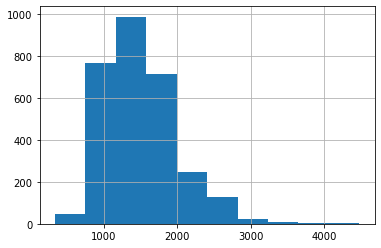

In [25]:
full_data['gr_liv_area'].hist()

<AxesSubplot:>

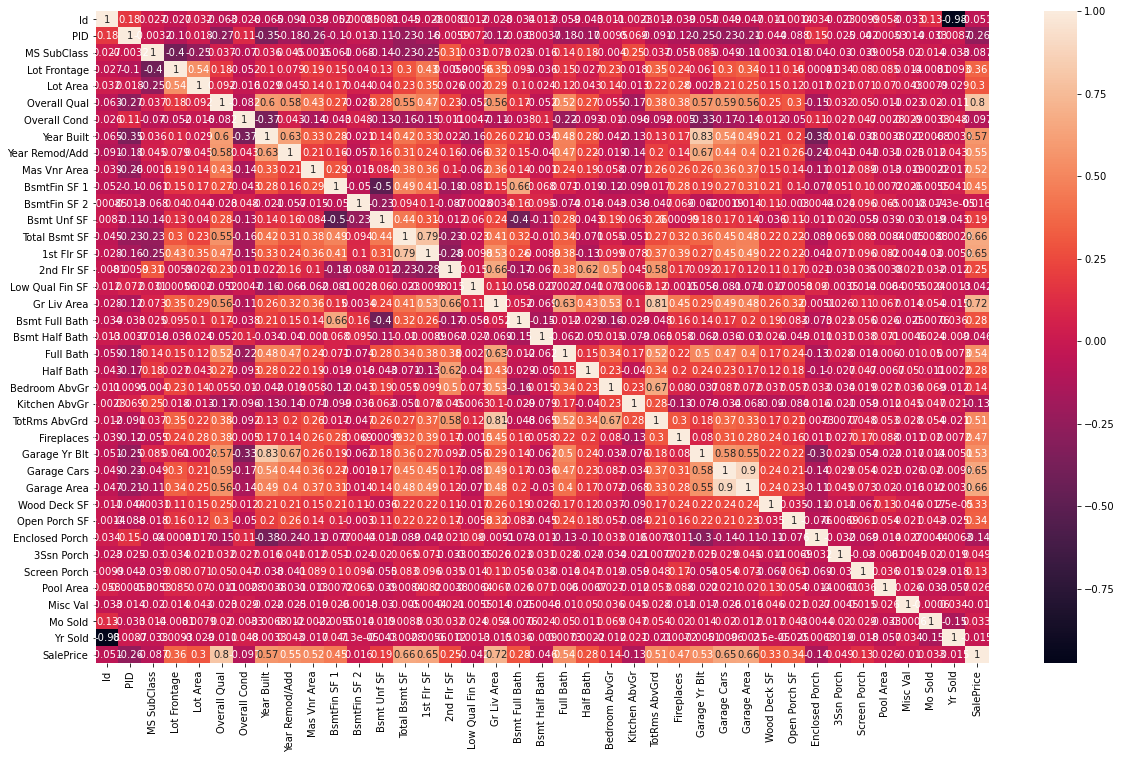

In [26]:
# look at a heatmap to see correlation across entire training df

plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True)

In [27]:
# Create our X_train, X_test, and y 
# I used slicing to get all data up until the end of my train data set 
# Target is Sale Price

X_train = full_data[:train.shape[0]]
X_test = full_data[train.shape[0]:]
y = train['SalePrice']

The distribution of Sale Price is skewed to the right. When utilizing regression we assume normality in our data so the right skew will cause problems for our model. We need to transform our target by taking the natural log which will reduce the range and should make our distribution appear closer to normal.

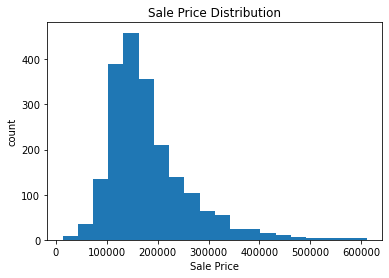

In [28]:
# lets take a look at the distribution of sale price for our training set
# create 20 bins to represent data

plt.hist(y,bins=20);
plt.title("Sale Price Distribution")
plt.xlabel('Sale Price')
plt.ylabel('count');
# plt.savefig('../img/salepricedist')

In [29]:
# take the log of target variable

y = np.log1p(y)

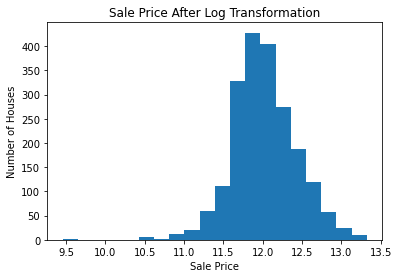

In [30]:
# plot the log distribution of our target
plt.hist(y,bins=20);
plt.title('Sale Price After Log Transformation')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses');
# plt.savefig('../img/yafterlog')

WOW, look at how much better our distribution looks now. This will reduce our model's error significantly.

## Pipeline Preprocessing

- The preprocessing is essential to cleaning all the date before inputting it into our pipeline. We will need to split the features into numerical and categorical sets. Next, all missing values need to be imputed using specific strategies. Numeric values will be scaled and categoric one hot encoded. This will be the most efficient way to productionize our model later on.

In [31]:
# set up preprocessing for numeric columns

si = SimpleImputer(strategy='mean',add_indicator=True)
scaler = StandardScaler()

# set up preprocessing for categorical columns

si_mode = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore')

# select columns by data type

num_cols = selector(dtype_include='number')
cat_cols = selector(dtype_exclude='number')

# do all preprocessing
# here we are creating a preprocessor variable that holds our column transformer for both our numeric
# and categoric features
preprocessor = make_column_transformer(
    (make_pipeline(si,scaler), num_cols),
    (make_pipeline(si_mode,ohe), cat_cols),
    remainder = 'passthrough'
)

## Dummy Model

- A dummy regressor is a default model than will predict a constant value for our target value. In this instance, I used the mean of our target as our predictions. This is why when we visualize our predictions it is a horizontal line.

In [32]:
from sklearn.dummy import DummyRegressor

In [33]:
# create a dummy model for a baseline score to compare our models with

dum = DummyRegressor()

dum.fit(X_train,y)

DummyRegressor()

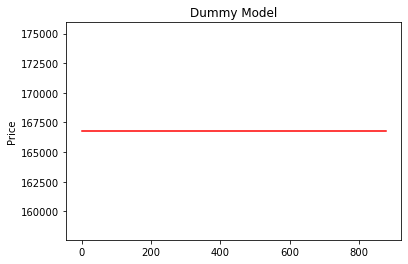

In [34]:
plt.plot(np.exp(dum.predict(X_test)),'-',c='r')
plt.title("Dummy Model")
plt.ylabel("Price");
# plt.savefig('../img/DummyModel')

## Lasso Model

- A lasso model is a Linear Regression model that uses an alpha to regularize our data and does feature selection at once. As our alpha increases more regularization occurs zeroing out more coefficients.

In [35]:
# create the pipeline using our preprocessor variable we assigned earlier and a regression model

pipe = make_pipeline(preprocessor,Lasso(alpha=.0003,random_state=42))

In [36]:
# fit the model on X and y

pipe.fit(X_train,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE708>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE788>)])),
                ('lasso', Lasso(alpha=0.0003, random_state=42))])

In [37]:
pipe.score(X_train,y)

0.9631518258291036

In [83]:
train_preds = pipe.predict(X_train)

In [85]:
# RMSE for Lasso on Training Set

mean_squared_error(np.exp(y),np.exp(train_preds),squared=False)

18490.95929743318

In [40]:
# make a dict containing params for our GridSearch to utilize

params = {
    'lasso__alpha':[.001,.001,.05,.01,.1,2],
    'lasso__max_iter':range(500,750,1250),
    'lasso__selection':['cyclic','random']
    
}

In [41]:
# create a grid object with the lasso pipeline, params, cross validated over n folds, and n_jobs=-1 to speed up fitting process

lasso_grid = GridSearchCV(pipe,params,n_jobs=-1,cv=20)
lasso_grid.fit(X_train,y)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE708>),
                                                                        ('pipeline-2',
                                                                         Pipeline...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE788>)])),
                                       ('lasso',
                                        Lasso(alpha=0.0003, random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.001, 0.05, 0.01, 0.1, 2],
                         'lasso__max_iter': range(500, 750, 1250),
                         'lasso__selection': ['cyclic', 'random']})

<AxesSubplot:xlabel='gr_liv_area', ylabel='SalePrice'>

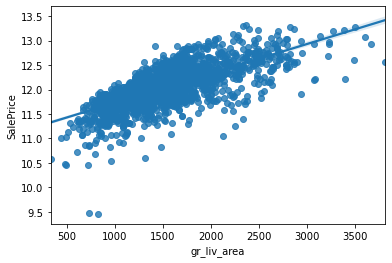

In [42]:
sns.regplot(X_train['gr_liv_area'],y)

In [43]:
# see lasso coefs

lasso_grid.best_estimator_.named_steps['lasso'].coef_

array([ 5.55202679e-03,  4.21361387e-03,  4.00289382e-03,  6.64137595e-03,
        5.62873212e-03,  2.99071351e-04,  4.46867750e-02,  2.67574137e-02,
        2.68556248e-02,  1.08094095e-02, -1.56462625e-02, -4.87183882e-03,
        4.08503657e-03, -0.00000000e+00,  2.83719590e-03, -0.00000000e+00,
        8.21978806e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.10261685e-02,  7.60680374e-03,  0.00000000e+00,
       -0.00000000e+00,  2.13343632e-02,  6.40398969e-03,  3.32256382e-04,
        9.38500000e-03,  0.00000000e+00,  9.51753989e-03,  1.40490794e-03,
       -0.00000000e+00,  8.83348436e-04,  9.10032883e-03,  4.90725316e-04,
        5.35106510e-03, -3.23179441e-03, -2.68648641e-03,  1.02327601e-02,
        1.59059004e-02,  0.00000000e+00,  0.00000000e+00,  4.48674846e-03,
        3.24207061e-03,  4.44785733e-03,  1.00005259e-03,  2.21144867e-03,
        0.00000000e+00,  8.57765153e-05, -0.00000000e+00,  2.59742083e-01,
        1.41363415e-02,  

In [44]:
lasso_grid.best_params_

{'lasso__alpha': 0.001, 'lasso__max_iter': 500, 'lasso__selection': 'cyclic'}

In [45]:
lasso_grid.best_score_

0.9513147089218071

In [46]:
preds = lasso_grid.predict(X_train)

In [47]:
mean_squared_error(y,preds,squared=False)

0.08724086681632133

In [48]:
out_preds = np.exp(lasso_grid.predict(X_test))

In [49]:
lasso_df = pd.DataFrame(lasso_grid.cv_results_).sort_values(by='rank_test_score').head(5)

In [50]:
lasso_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_lasso__max_iter,param_lasso__selection,params,split0_test_score,split1_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.212944,0.041744,0.012461,0.003430,0.001,500,cyclic,"{'lasso__alpha': 0.001, 'lasso__max_iter': 500...",0.958512,0.886205,...,0.956004,0.923468,0.870340,0.957443,0.965954,0.962325,0.962142,0.951315,0.027378,1
2,0.233312,0.042075,0.012613,0.004156,0.001,500,cyclic,"{'lasso__alpha': 0.001, 'lasso__max_iter': 500...",0.958512,0.886205,...,0.956004,0.923468,0.870340,0.957443,0.965954,0.962325,0.962142,0.951315,0.027378,1
1,0.229760,0.045828,0.013162,0.003828,0.001,500,random,"{'lasso__alpha': 0.001, 'lasso__max_iter': 500...",0.958512,0.886187,...,0.956002,0.923466,0.870343,0.957386,0.965947,0.962307,0.962079,0.951272,0.027342,3
3,0.234664,0.031222,0.014913,0.008748,0.001,500,random,"{'lasso__alpha': 0.001, 'lasso__max_iter': 500...",0.958512,0.886187,...,0.956002,0.923466,0.870343,0.957386,0.965947,0.962307,0.962079,0.951272,0.027342,3
6,0.163298,0.017604,0.013462,0.005711,0.01,500,cyclic,"{'lasso__alpha': 0.01, 'lasso__max_iter': 500,...",0.955067,0.856479,...,0.950597,0.904130,0.846217,0.948734,0.954845,0.958256,0.948955,0.940877,0.033687,5


In [51]:
# we need to access our best estimator, then the column transformer, pipeline2, onehotencoder, 
# to pull out the feature names after lasso regularization is complete

lasso_clf_features = lasso_grid.best_estimator_.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names(input_features = X_train.dtypes[X_train.dtypes == 'object'].index)

# combine features from OHE and all numeric features into one set
features = np.concatenate([X_train.dtypes[X_train.dtypes != 'object'].index,lasso_clf_features])

# get the coefs from our best estimator
coefs = lasso_grid.best_estimator_.named_steps['lasso'].coef_

# df storing our feature names and coefs together
coef_df = pd.DataFrame(list(zip(features,coefs)))

# all coefs not equal to zero
coefs_remaining = coef_df[coef_df[1] != abs(0)]

# set index to feature names in order to plot
coefs_remaining.set_index(coefs_remaining[0],drop=True,inplace=True)

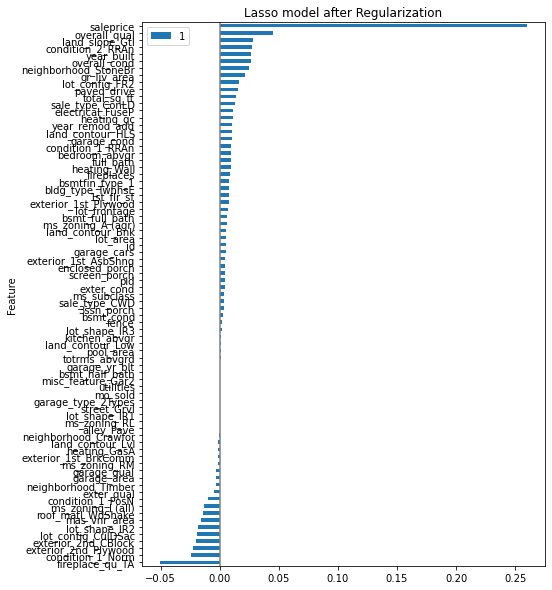

In [52]:
# create a plot of the top 10 features by coefs post regularization

coefs_remaining.sort_values(by=1).plot(kind='barh', figsize=(16,10))
plt.title('Lasso model after Regularization')
plt.ylabel('Feature')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.55)
# plt.savefig('../img/ENettopfeats.png')

In [53]:
print(f"Lasso picked: {sum(coefs!=0)} features and eliminated the other: {sum(coefs==0)}")

Lasso picked: 80 features and eliminated the other: 185


## Plot Split Scores

I created a plot to show split scores for my best Lasso estimator. This shows the variation in splits across our dataset.

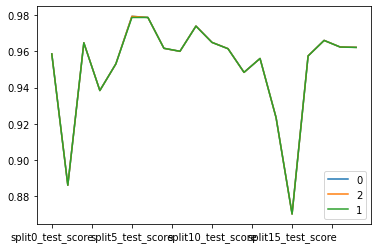

In [54]:
lasso_df.loc[:1,'split0_test_score':'split19_test_score'].T.plot();

## Elastic Net

In [55]:
enet_pipe = make_pipeline(preprocessor,ElasticNet(random_state=42))

In [56]:
params = {
    'elasticnet__alpha':[.001,.01,.05,1],
    'elasticnet__l1_ratio':[0.3,0.4,0.5,0.6,0.7],
    'elasticnet__max_iter':[500,750,1000],
}

In [57]:
enet_grid = GridSearchCV(enet_pipe,params,cv=10,n_jobs=-1)
enet_grid.fit(X_train,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE708>),
                                                                        ('pipeline-2',
                                                                         Pipeline...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE788>)])),
                                       ('elasticnet',
                                        ElasticNet(random_state=42))]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.001, 0.01, 0.05, 1],
                         'elasticnet__l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'elasticnet__max_iter': [500, 750, 1000]})

In [58]:
enet_grid.best_params_

{'elasticnet__alpha': 0.001,
 'elasticnet__l1_ratio': 0.3,
 'elasticnet__max_iter': 500}

In [59]:
enet_grid.score(X_train,y)

0.9621293309306314

In [60]:
enet_grid.best_score_

0.9532451918628935

In [79]:
mean_squared_error(np.exp(y),np.exp(enet_grid.predict(X_train)),squared=False)

18468.245118602677

In [62]:
out_preds = np.exp(enet_grid.predict(X_test))

In [63]:
out_preds[:10]

array([132408.45741133, 179511.29418668, 190360.70543047, 132299.37716919,
       174245.3027563 , 131833.25194002, 141289.54347923, 169073.66561471,
       181672.5633921 , 171938.08782247])

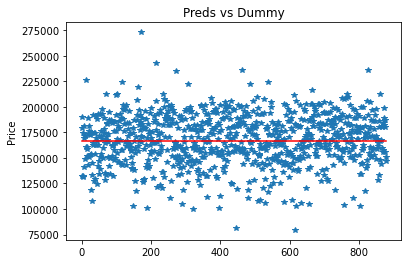

In [64]:
# plot predictions against dummy model

plt.plot(out_preds,'*')
plt.plot(np.exp(dum.predict(X_test)),'-',c='r')
plt.title("Preds vs Dummy")
plt.ylabel("Price");
# plt.savefig('../img/DummyModel')

In [65]:
X_train.dtypes.value_counts()

int64      33
object     29
float64    20
dtype: int64

In [66]:
# we need to access our best estimator, then the column transformer, pipeline2, onehotencoder, 
# to pull out the feature names after ENet regularization is complete

enet_clf_features = enet_grid.best_estimator_.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names(input_features = X_train.dtypes[X_train.dtypes == 'object'].index)

# combine features from OHE and all numeric features into one set
features = np.concatenate([X_train.dtypes[X_train.dtypes != 'object'].index,enet_clf_features])

# get the coefs from our best estimator
coefs = enet_grid.best_estimator_.named_steps['elasticnet'].coef_

# df storing our feature names and coefs together
coef_df = pd.DataFrame(list(zip(features,coefs)))

# all coefs not equal to zero
coefs_remaining = coef_df[coef_df[1] != abs(0)]

# set index to feature names in order to plot
coefs_remaining.set_index(coefs_remaining[0],drop=True,inplace=True)

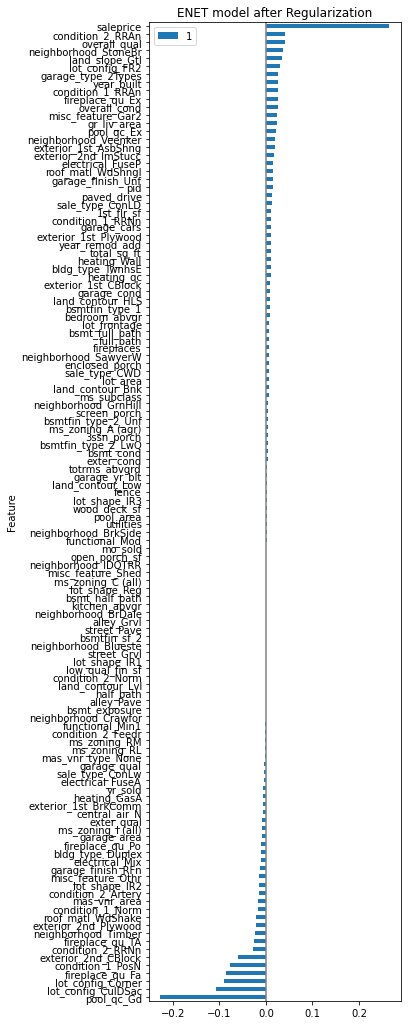

In [67]:
# create a plot of the features by coefs post regularization

coefs_remaining.sort_values(by=1).plot(kind='barh', figsize=(10,18))
plt.title('ENET model after Regularization')
plt.ylabel('Feature')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.55)
# plt.savefig('../img/ENettopfeats.png')

In [68]:
print(f"Elastic Net picked: {sum(coefs!=0)} features and eliminated the other: {sum(coefs==0)}")

Elastic Net picked: 125 features and eliminated the other: 140


One of the biggest observations I made while looking at my features. Is that Sale Type COD which is a Court Order/Deed Sale has a massive impact on my model. This should be changed in future versions because foreclosures will impact Sale Price making it harder for my model to identify accurate trends.

In [69]:
train_preds = np.exp(enet_grid.predict(X_train))

In [70]:
residuals = abs(y - train_preds)

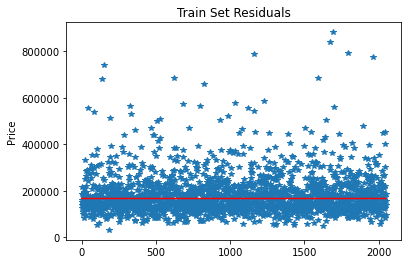

In [71]:
# plot our residuals against dummy model to see if SD around the mean is consistent

plt.plot(residuals,'*')
plt.plot(np.exp(dum.predict(X_train)),'-',c='r');
plt.title("Train Set Residuals")
plt.ylabel("Price");
plt.savefig("../img/trainresids")

In [72]:
pd.DataFrame(enet_grid.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,param_elasticnet__max_iter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.443307,0.130377,0.019818,0.007991,0.001,0.3,500,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.921697,0.958596,...,0.971610,0.967501,0.966660,0.955018,0.900159,0.961780,0.969746,0.953245,0.022254,1
1,0.520977,0.124716,0.015714,0.003954,0.001,0.3,750,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.921697,0.958596,...,0.971610,0.967501,0.966660,0.955018,0.900159,0.961780,0.969746,0.953245,0.022254,1
2,0.435698,0.048540,0.022017,0.010653,0.001,0.3,1000,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.921697,0.958596,...,0.971610,0.967501,0.966660,0.955018,0.900159,0.961780,0.969746,0.953245,0.022254,1
3,0.309681,0.065240,0.017117,0.008064,0.001,0.4,500,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920505,0.958258,...,0.972453,0.967030,0.966066,0.955090,0.899008,0.961609,0.968352,0.952781,0.022583,4
4,0.308180,0.047796,0.015513,0.005755,0.001,0.4,750,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920505,0.958258,...,0.972453,0.967030,0.966066,0.955090,0.899008,0.961609,0.968352,0.952781,0.022583,4
5,0.336809,0.047860,0.014214,0.003031,0.001,0.4,1000,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.920505,0.958258,...,0.972453,0.967030,0.966066,0.955090,0.899008,0.961609,0.968352,0.952781,0.022583,4
6,0.296270,0.015389,0.016515,0.004909,0.001,0.5,500,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.919065,0.957741,...,0.972891,0.966725,0.965446,0.954686,0.898178,0.961527,0.966920,0.952211,0.022840,7
7,0.303577,0.052199,0.014913,0.003731,0.001,0.5,750,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.919065,0.957741,...,0.972891,0.966725,0.965446,0.954686,0.898178,0.961527,0.966920,0.952211,0.022840,7
8,0.257933,0.037568,0.017316,0.007205,0.001,0.5,1000,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.919065,0.957741,...,0.972891,0.966725,0.965446,0.954686,0.898178,0.961527,0.966920,0.952211,0.022840,7
9,0.268546,0.057222,0.014714,0.003037,0.001,0.6,500,"{'elasticnet__alpha': 0.001, 'elasticnet__l1_r...",0.918168,0.957362,...,0.972979,0.966357,0.964865,0.953768,0.897818,0.961452,0.965784,0.951715,0.022904,10


## SVR 

In [73]:
pipe_svr = make_pipeline(preprocessor,SVR())

In [74]:
params = {
    'svr__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'svr__gamma': ['scale', 'auto'],
    'svr__C':[0.1,1,5,10]
}

In [75]:
grid = GridSearchCV(pipe_svr,params,n_jobs=-1)
grid.fit(X_train,y)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE708>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps...mputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F06B2FE788>)])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 5, 10],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']})

In [76]:
grid.best_params_

{'svr__C': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}

In [74]:
grid.score(X_train,y)

0.9302108845829955

In [75]:
preds = grid.predict(X_train)

In [76]:
preds

array([12.04375815, 12.32261959, 11.8531328 , ..., 12.07986857,
       11.736243  , 12.18118881])

In [77]:
mean_squared_error(y,preds,squared=False)

0.108684003279452

In [78]:
out_preds= np.exp(grid.predict(X_test))

## K Neighbors Regressor

In [79]:
pipe_knr = make_pipeline(preprocessor, KNeighborsRegressor())

In [80]:
params = {
    'kneighborsregressor__n_neighbors':range(21,41,2),
    'kneighborsregressor__metric':['minkowski','manhattan','euclidean'],
    'kneighborsregressor__weights':['uniform','distance'],
    'kneighborsregressor__leaf_size':range(10,60,10)
}

In [81]:
gs = GridSearchCV(pipe_knr,params,n_jobs=-1)

gs.fit(X_train,y)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8A88>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8B08>)])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kneighborsregressor__leaf_size': range(10, 60, 10),
                         'kneighborsregressor__metric': ['minkowski',
                                                         'manhattan',
                                                         'euclidean'],
                         'kneighborsregressor__n_neighbors': range(21, 41, 2),
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']})

In [82]:
print(f"Best Params: {gs.best_params_}")

Best Params: {'kneighborsregressor__leaf_size': 20, 'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 21, 'kneighborsregressor__weights': 'distance'}


In [83]:


print(f"Best Score: {gs.best_score_}")

kn_preds = gs.predict(X_train)

print(mean_squared_error(y,kn_preds,squared=False))

out_preds = gs.predict(X_test)

Best Score: 0.821813644250871
0.0004734019355222177


## Ridge Model

- A ridge model is similar to Lasso in regards to using an alpha to regularize our data. The difference is instead of zeroing out coefficients each feature will be given a value between 0 and 1. 

In [84]:
# make pipeline with preprocessor and ridge model

ridge_pipe = make_pipeline(preprocessor,Ridge())

In [85]:
# fit pipeline to training data

ridge_pipe.fit(X_train,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8A88>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8B08>)])),
                ('ridge', Ridge())])

In [86]:
# score pipeline on training data

ridge_pipe.score(X_train,y)

0.93703565353639

In [87]:
# rmse on training data

mean_squared_error(y,ridge_pipe.predict(X_train),squared=False)

0.10323313827971049

In [88]:
# params for gridsearch

params = {
    'ridge__alpha':[.0001,.001,.05,.01,.1,.5,1,5,10]
}

In [89]:
# gridsearch object

ridge_grid = GridSearchCV(ridge_pipe,params)

In [90]:
# fit gridsearch to training data

ridge_grid.fit(X_train,y)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8A88>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000018BFA2F8B08>)])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.0001, 0.001, 0.05, 0.01, 0.1, 0.5,
                                          1, 5, 10]})

In [91]:
# get best params
ridge_grid.best_params_

{'ridge__alpha': 10}

In [92]:
# best grid score
ridge_grid.score(X_train,y)

0.9314976613092946

In [93]:
# grid rmse
mean_squared_error(y,ridge_grid.predict(X_train),squared=False)


0.10767737991089744

In [94]:
pd.DataFrame(zip(X_train.columns,ridge_grid.best_estimator_.named_steps['ridge'].coef_))

,0,1
0,ms_subclass,-0.007299
1,ms_zoning,0.011579
2,lot_frontage,0.022734
3,lot_area,0.003500
4,street,0.083689
...,...,...
58,misc_feature,0.057293
59,mo_sold,0.002727
60,yr_sold,0.038893
61,sale_type,0.054643


In [95]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = out_preds
sub.to_csv('submission.csv',index=False)